In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Carica il dataset
df = pd.read_csv(r"C:\Users\alezi\Desktop\Cartella Epicode\owid-covid-data.csv")

# Verifica dimensioni e metadati
print("Dimensioni del dataset:", df.shape)
print("Colonne disponibili:")
print(df.columns)


Dimensioni del dataset: (429435, 67)
Colonne disponibili:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       

In [9]:
# 2) Filtra i dati per continente (escludendo valori nulli)
df_continents = df[df['continent'].notna()]

# Calcolo del numero di casi totali per continente
cases_by_continent = df_continents.groupby('continent')['total_cases'].max()

# Calcolo della percentuale rispetto al totale mondiale
total_cases_worldwide = df['total_cases'].max()
cases_percentage = (cases_by_continent / total_cases_worldwide) * 100

print("CASI TOTALI PER CONTINENTE:\n", cases_by_continent)
print("PERCENTUALI PER CONTINENTE:\n", cases_percentage)


CASI TOTALI PER CONTINENTE:
 continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64
PERCENTUALI PER CONTINENTE:
 continent
Africa            0.524931
Asia             12.808026
Europe            5.026313
North America    13.331777
Oceania           1.528763
South America     4.834840
Name: total_cases, dtype: float64


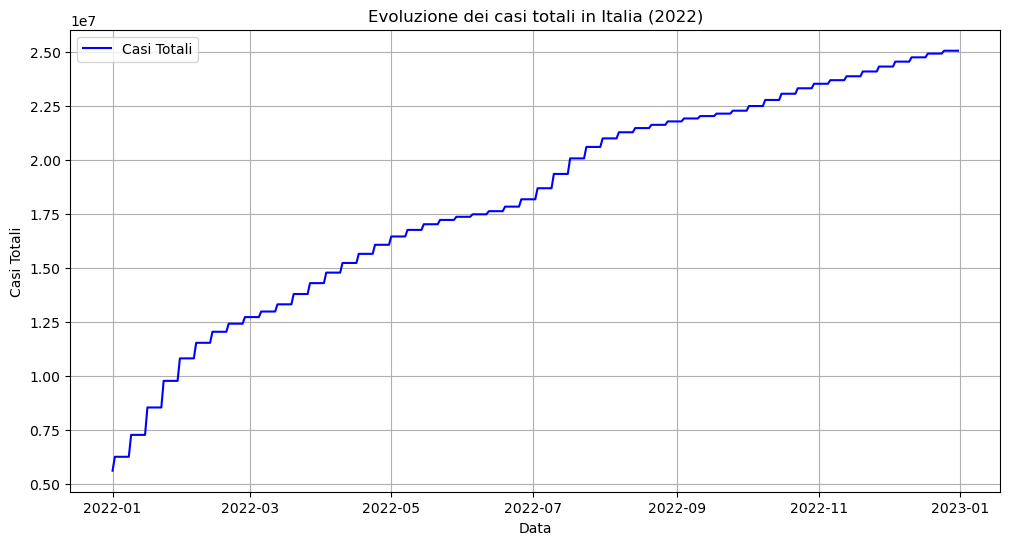

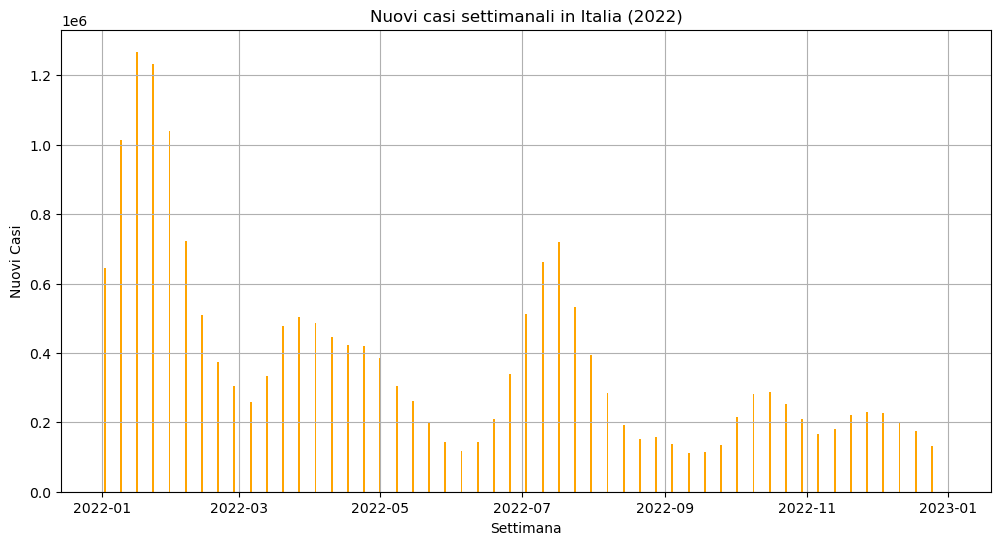

In [48]:
import matplotlib.pyplot as plt

# Filtra i dati per l'Italia e l'anno 2022
italy_data = df[(df['location'] == "Italy") & (df['date'] >= "2022-01-01") & (df['date'] <= "2022-12-31")]

# Conversione della data in formato datetime
italy_data = italy_data.copy()
italy_data['date'] = pd.to_datetime(italy_data['date'])  # Corretto

# Grafico dell'evoluzione dei casi totali
plt.figure(figsize=(12, 6))
plt.plot(italy_data['date'], italy_data['total_cases'], label='Casi Totali', color='blue')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.legend()
plt.grid()
plt.show()

# Calcola i nuovi casi settimanali
italy_data['new_cases'] = italy_data['new_cases'].fillna(0)  # Gestisce valori nulli
italy_weekly_cases = italy_data.resample('W', on='date')['new_cases'].sum()

# Grafico dei nuovi casi settimanali
plt.figure(figsize=(12, 6))
plt.bar(italy_weekly_cases.index, italy_weekly_cases, color='orange')
plt.title('Nuovi casi settimanali in Italia (2022)')
plt.xlabel('Settimana')
plt.ylabel('Nuovi Casi')
plt.grid()
plt.show()



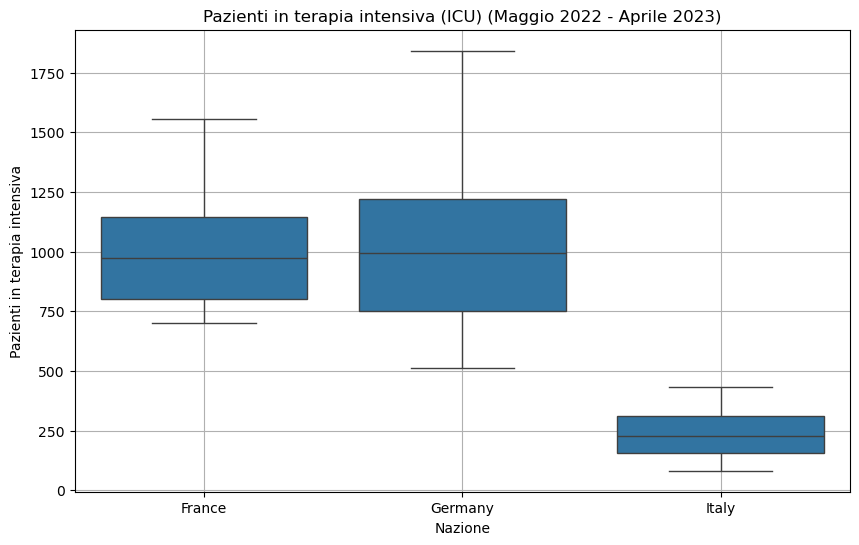

In [50]:
 # 4) Filtra i dati per i tre paesi e il periodo richiesto
countries = ['Italy', 'Germany', 'France']
icu_df = df[(df['location'].isin(countries)) & 
                (df['date'] >= '2022-05-01') & 
                (df['date'] <= '2023-04-30')]

# Seleziona solo le colonne necessarie
icu_df = icu_df[['location', 'date', 'icu_patients']].dropna()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=icu_df)
plt.title('Pazienti in terapia intensiva (ICU) (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva')
plt.grid()
plt.show()




In [36]:
# 5) # Filtra i dati per i quattro paesi e il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
hospital_df = df[(df['location'].isin(countries)) & 
                     (df['date'] >= '2023-01-01') & 
                     (df['date'] <= '2023-12-31')].copy()  # Crea una copia esplicita

# Sostituisci i NaN con 0 senza avviso
hospital_df['hosp_patients'] = hospital_df['hosp_patients'].fillna(0)

# Somma i pazienti ospedalizzati per nazione
hospital_sum = hospital_data.groupby('location')['hosp_patients'].sum()

# Mostra i risultati
print("Somma dei pazienti ospedalizzati nel 2023:")
print(hospital_sum)

# Breve commento
print("\nBreve commento:")
print("- I dati mostrano il numero totale di pazienti ospedalizzati per ciascun paese nel 2023.")
print("- Eventuali valori nulli sono stati sostituiti con 0. Questo può influire sull'analisi,")
print("  poiché alcuni dati mancanti potrebbero rappresentare lacune nella raccolta dati.")
print("- Tuttavia, questa sostituzione consente comunque un'analisi complessiva coerente tra i paesi.")


Somma dei pazienti ospedalizzati nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Breve commento:
- I dati mostrano il numero totale di pazienti ospedalizzati per ciascun paese nel 2023.
- Eventuali valori nulli sono stati sostituiti con 0. Questo può influire sull'analisi,
  poiché alcuni dati mancanti potrebbero rappresentare lacune nella raccolta dati.
- Tuttavia, questa sostituzione consente comunque un'analisi complessiva coerente tra i paesi.
